# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
cities

['busselton',
 'port alfred',
 'pacific grove',
 'wanaka',
 'havoysund',
 'waipawa',
 'taolanaro',
 'bluff',
 'svetlyy',
 'vaini',
 'kangaba',
 'dingle',
 'cidreira',
 'urusha',
 'tromso',
 'kirakira',
 'albany',
 'yellowknife',
 'svetlogorsk',
 'minab',
 'avarua',
 'carnarvon',
 'new norfolk',
 'derzhavinsk',
 'bangolo',
 'ushuaia',
 'mataura',
 'cabo san lucas',
 'punta arenas',
 'rikitea',
 'dunedin',
 'hermanus',
 'ardatov',
 'vila franca do campo',
 'ponta do sol',
 'jamestown',
 'san juan',
 'faanui',
 'muli',
 'saleaula',
 'chernyshevskiy',
 'qabis',
 'kachiry',
 'shitanjing',
 'udachnyy',
 'kapaa',
 'dukat',
 'saskylakh',
 'castro',
 'puerto ayora',
 'atamanovka',
 'nata',
 'egvekinot',
 'illoqqortoormiut',
 'sao filipe',
 'nizhneyansk',
 'luderitz',
 'shingu',
 'buraydah',
 'east london',
 'sambava',
 'port hardy',
 'batticaloa',
 'tiksi',
 'naze',
 'hobart',
 'belushya guba',
 'nalut',
 'port-de-paix',
 'mitsamiouli',
 'klaksvik',
 'hami',
 'caravelas',
 'bambous virieux',
 '

In [6]:
city_name = 'turgutlu'
response = requests.get(query_url + city_name).json()
print(response)

{'coord': {'lon': 27.7, 'lat': 38.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41.74, 'feels_like': 27.61, 'temp_min': 41, 'temp_max': 42.8, 'pressure': 1022, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1584572234, 'sys': {'type': 1, 'id': 6977, 'country': 'TR', 'sunrise': 1584591235, 'sunset': 1584634791}, 'timezone': 10800, 'id': 298806, 'name': 'Turgutlu', 'cod': 200}


In [7]:
# empty arrays to be appended
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# start of the print
print("Beginning Data Retrieval")
print("-----------------------------")

# start counter
count = 0

for citi in cities:
    # Build query URL
    query_url = f"{url}appid={weather_api_key}&q={citi}&units={units}"
    
    # Get weather data
    weather_json = requests.get(query_url).json()
    
    # increase count
    count += 1

    try:
        #print city name
        name = weather_json["name"]
        print(f"Processing Record {count} of {len(cities)}: {name}")
        
        #append arrays
        city.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        wind_speed.append(weather_json["wind"]["speed"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        
    except:
        print("City not found. Skipping...")
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 621: Busselton
Processing Record 2 of 621: Port Alfred
Processing Record 3 of 621: Pacific Grove
Processing Record 4 of 621: Wanaka
Processing Record 5 of 621: Havøysund
Processing Record 6 of 621: Waipawa
City not found. Skipping...
Processing Record 8 of 621: Bluff
Processing Record 9 of 621: Tsimmerbude
Processing Record 10 of 621: Vaini
Processing Record 11 of 621: Kangaba
Processing Record 12 of 621: Dingle
Processing Record 13 of 621: Cidreira
Processing Record 14 of 621: Urusha
Processing Record 15 of 621: Tromsø
Processing Record 16 of 621: Kirakira
Processing Record 17 of 621: Albany
Processing Record 18 of 621: Yellowknife
Processing Record 19 of 621: Forsytheganj
Processing Record 20 of 621: Mīnāb
Processing Record 21 of 621: Avarua
Processing Record 22 of 621: Carnarvon
Processing Record 23 of 621: New Norfolk
Processing Record 24 of 621: Derzhavīnsk
Processing Record 25 of 621: Bangolo
Processing

Processing Record 216 of 621: Marshall
Processing Record 217 of 621: Phan Thiet
Processing Record 218 of 621: Fortuna
Processing Record 219 of 621: Bathsheba
Processing Record 220 of 621: Iqaluit
Processing Record 221 of 621: Burns Lake
Processing Record 222 of 621: Hong Kong
Processing Record 223 of 621: Codrington
Processing Record 224 of 621: San Jose
Processing Record 225 of 621: Kutum
Processing Record 226 of 621: Daman
Processing Record 227 of 621: Risod
Processing Record 228 of 621: Sungurlu
Processing Record 229 of 621: Ubari
Processing Record 230 of 621: Batagay-Alyta
Processing Record 231 of 621: Nanortalik
Processing Record 232 of 621: Noumea
Processing Record 233 of 621: Ipixuna
Processing Record 234 of 621: Itarema
Processing Record 235 of 621: Alice Springs
Processing Record 236 of 621: Russell
Processing Record 237 of 621: Te Anau
Processing Record 238 of 621: Vestmannaeyjar
Processing Record 239 of 621: Bereda
Processing Record 240 of 621: Zyryanka
Processing Record 241

Processing Record 432 of 621: Anshun
Processing Record 433 of 621: Belle Glade
Processing Record 434 of 621: Port Hawkesbury
Processing Record 435 of 621: Guerrero Negro
Processing Record 436 of 621: Abu Kamal
Processing Record 437 of 621: Batagay
Processing Record 438 of 621: Huejúcar
Processing Record 439 of 621: Holmestrand
Processing Record 440 of 621: George Town
Processing Record 441 of 621: Salekhard
Processing Record 442 of 621: São João del Rei
Processing Record 443 of 621: Wufeng
Processing Record 444 of 621: Rakiv Lis
Processing Record 445 of 621: Mayumba
Processing Record 446 of 621: Port Huron
Processing Record 447 of 621: Kushiro
Processing Record 448 of 621: Surabaya
Processing Record 449 of 621: Miranda
Processing Record 450 of 621: San Joaquin
Processing Record 451 of 621: Assiniboia
Processing Record 452 of 621: Roebourne
Processing Record 453 of 621: Comodoro Rivadavia
Processing Record 454 of 621: Oranjemund
Processing Record 455 of 621: Diapaga
Processing Record 45

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
from datetime import datetime
converted_date = []

for dt in date:
    converted_date.append(datetime.fromtimestamp(dt))
    

# read csv file
df = pd.DataFrame({
    "City": city,
    "Country": country,
    "Date": converted_date,
    "Latitude": lat,
    "Longitude": lng,
    "Cloudiness": cloudiness,
    "Humidity": humidity,
    "Max Temperature": max_temp,
    "Wind Speed": wind_speed
})

# save data frame as csv
df.to_csv("../output_data/cities.csv", encoding='utf-8', index=False)

# view number of items per column
df.count()


City               568
Country            568
Date               568
Latitude           568
Longitude          568
Cloudiness         568
Humidity           568
Max Temperature    568
Wind Speed         568
dtype: int64

In [11]:
df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Busselton,AU,2020-03-18 18:57:15,-33.65,115.33,84,67,55.99,8.03
1,Port Alfred,ZA,2020-03-18 18:57:15,-33.59,26.89,26,87,68.00,1.99
2,Pacific Grove,US,2020-03-18 18:52:17,36.62,-121.92,90,58,57.20,10.29
3,Wanaka,NZ,2020-03-18 18:57:15,-44.70,169.15,21,74,48.16,10.76
4,Havøysund,NO,2020-03-18 18:57:15,71.00,24.66,90,92,26.60,23.04
...,...,...,...,...,...,...,...,...,...
563,Bāgeshwar,IN,2020-03-18 19:01:01,29.85,79.77,4,50,40.78,7.27
564,Galle,LK,2020-03-18 19:01:01,6.04,80.22,68,80,81.10,13.27
565,Altay,CN,2020-03-18 19:01:01,47.87,88.12,94,78,23.32,2.55
566,Yenagoa,NG,2020-03-18 19:01:01,4.92,6.26,50,88,79.84,7.09


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

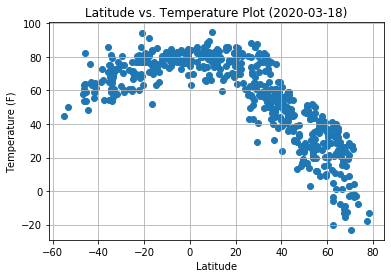

In [26]:
# Build a scatter plot for Latitiude vs Temperature
plt.scatter(df["Latitude"], df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Temperature Plot ({datetime.now().date()})")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemperature.png")

# Show plot
plt.show()

In [ ]:
Graph Explanation
This graph shows the relationship between the Latitude vs. Max temperature for each city.
So, the closer you get yo the equation the warmer the temperature gets. 

#### Latitude vs. Humidity Plot

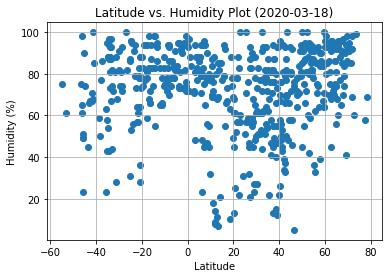

In [13]:
# Build a scatter plot for Latitiude vs Humidity
plt.scatter(df["Latitude"], df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"Latitude vs. Humidity Plot ({datetime.now().date()})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityvsLat.png")

# Show plot
plt.show()

In [ ]:
Graph Explanation
This graph shows the relationship between the Latitude vs the Humidity for each city. Since the data is
scattered all over the place, it shows that the Latitude does not have much affect over the Humidity.

#### Latitude vs. Cloudiness Plot

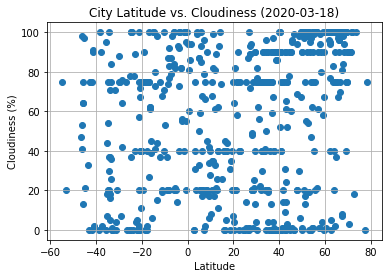

In [14]:
# Build a scatter plot for Latitiude vs Cloudiness
plt.scatter(df["Latitude"], df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudvsLat.png")

# Show plot
plt.show()

In [ ]:
Graph Explanation
This graph shows data points relationship between the City Latitude vs. Cloudiness for each city. Since this data is also 
very scattered, it shows that Latitude has no affect on the Cloudiness.

#### Latitude vs. Wind Speed Plot

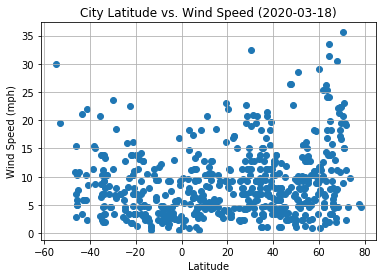

In [15]:
# Build a scatter plot for Latitiude vs Windspeed
plt.scatter(df["Latitude"], df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindinessvsLat.png")

# Show plot
plt.show()

## Linear Regression

y = -0.54x +67.21
The r-squared is: -0.7236706266534974


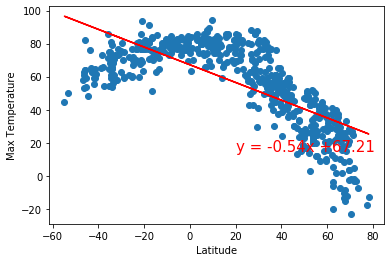

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

x_values = df["Latitude"]
y_values = df["Max Temperature"],

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames

northx_values = []
southx_values = []

# y axis for temp
northy_values = []
southy_values = []

# y axis for humidity
northhumidy_values = []
southhumidy_values = []

# y axis for cloudiness
northcloudsy_values = []
southcloudsy_values = []

# y axis for wind speed
northwindy_values = []
southwindy_values = []

# create index
indexes = range(0, len(df["City"]))

# append arrays
for index in indexes:
    if df["Latitude"][index] >= 0:
        northx_values.append(df["Latitude"][index])
        northy_values.append(df["Max Temperature"][index])
        northhumidy_values.append(df["Humidity"][index])
        northcloudsy_values.append(df["Cloudiness"][index])
        northwindy_values.append(df["Wind Speed"][index])
    if df["Latitude"][index] < 0:
        southx_values.append(df["Latitude"][index])
        southy_values.append(df["Max Temperature"][index])
        southhumidy_values.append(df["Humidity"][index])
        southcloudsy_values.append(df["Cloudiness"][index])
        southwindy_values.append(df["Wind Speed"][index])
        
# convert all array values from float to integer
northx_values = np.array(northx_values, dtype = "int")
southx_values = np.array(southx_values, dtype = "int")
northy_values = np.array(northy_values, dtype = "int")
southy_values = np.array(southy_values, dtype = "int")
northhumidy_values = np.array(northhumidy_values, dtype = "int")
southhumidy_values = np.array(southhumidy_values, dtype = "int")
northcloudsy_values = np.array(northcloudsy_values, dtype = "int")
southcloudsy_values = np.array(southcloudsy_values, dtype = "int")
northwindy_values = np.array(northwindy_values, dtype = "int")
southwindy_values = np.array(southwindy_values, dtype = "int")

print(len(northx_values))
print(len(southx_values))


398
170


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.28107374526023177


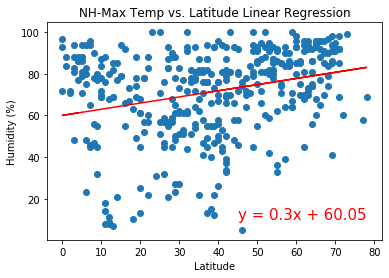

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northhumidy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northhumidy_values)
plt.plot(northx_values,regress_values,"r-")  
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("NH-Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")
  
# save the figure
plt.savefig("NorthernTemperatureAcrossCities.png")
# show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southhumidy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southhumidy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("SH-Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("SouthernTemperatureAcrossCities.png")

# show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28107374526023177


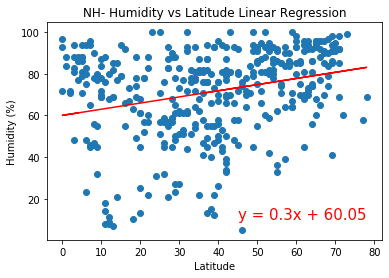

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northhumidy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northhumidy_values)
plt.plot(northx_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.title("NH- Humidity vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("NHHumidity vs Latitude Linear Regression.png")

# show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31939744417014815


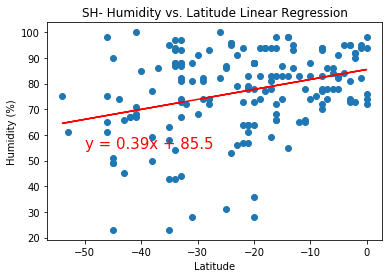

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southhumidy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southhumidy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")
plt.title("SH- Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("NH- Humidity vs Latitude Linear Regression")

# show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.285144950282236


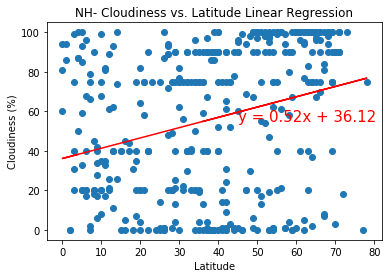

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northcloudsy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northcloudsy_values)
plt.plot(northx_values,regress_values,"r-")
plt.annotate(line_eq,(45,55),fontsize=15,color="red")
plt.title("NH- Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("NorthernCloudinessAcrossCities.png")

# show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2245261588946116


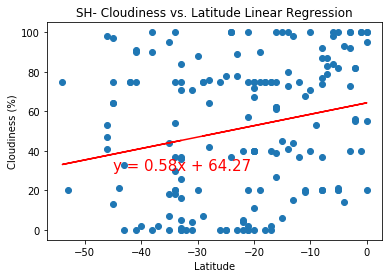

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southcloudsy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southcloudsy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-45,30),fontsize=15,color="red")
plt.title("SH- Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("SouthernCloudinessvsLinearReg.png")

# show plot
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20977654245975352


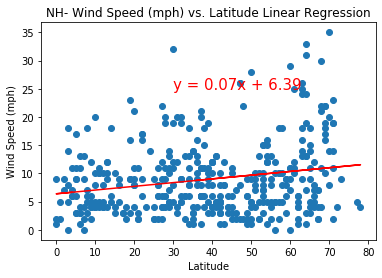

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northx_values, northwindy_values)
regress_values = northx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northx_values, northwindy_values)
plt.plot(northx_values,regress_values,"r-")
plt.annotate(line_eq,(30,25),fontsize=15,color="red")
plt.title("NH- Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("NHWindinessAcrossCities.png")

# show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3649512666110594


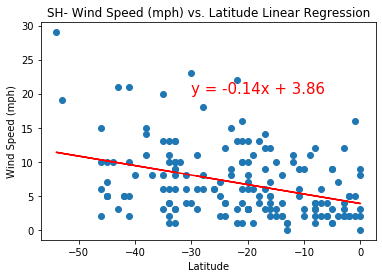

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southx_values, southwindy_values)
regress_values = southx_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southx_values, southwindy_values)
plt.plot(southx_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title("SH- Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue}")

# save the figure
plt.savefig("SHWindinessAcrossCities.png")

# show plot
plt.show()